<a href="https://colab.research.google.com/github/OctavioSantalucia/econometria/blob/main/ejercicios/C3%20Cap%C3%ADtulo%2013%20Diferencias%20en%20Diferencias%20Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

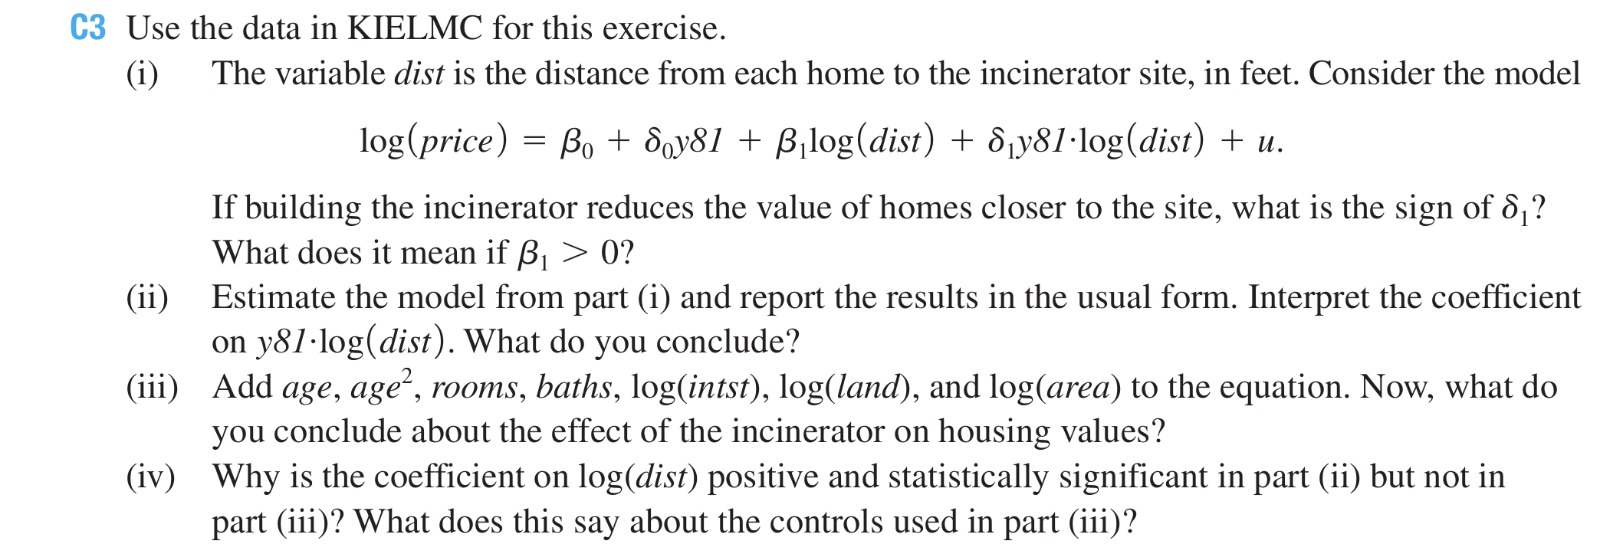

Descripción del dataset:
https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/KIELMC_description.txt
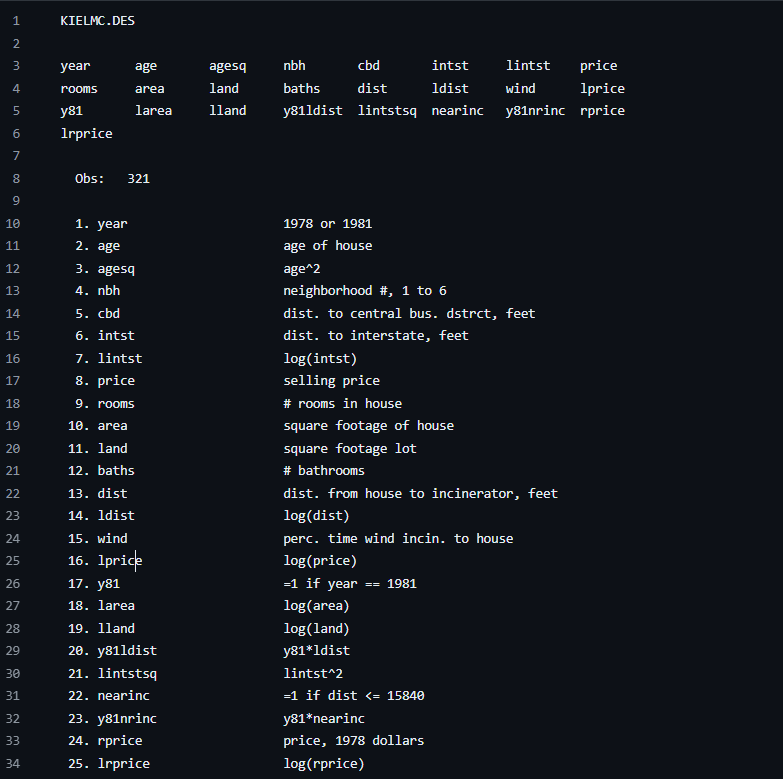

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/kielmc.xls?raw=true',header=None)



WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1978,48,2304,4,3000,1000,6.9078,60000,7,1660,...,11.00210,0,7.414573,8.429017,0.0,47.71770,1,0,60000.0,11.00210
1,1978,83,6889,4,4000,1000,6.9078,40000,6,2612,...,10.59663,0,7.867871,9.032409,0.0,47.71770,1,0,40000.0,10.59663
2,1978,58,3364,4,4000,1000,6.9078,34000,6,1144,...,10.43412,0,7.042286,8.517193,0.0,47.71770,1,0,34000.0,10.43412
3,1978,11,121,4,4000,1000,6.9078,63900,5,1136,...,11.06507,0,7.035269,9.210340,0.0,47.71770,1,0,63900.0,11.06507
4,1978,48,2304,4,4000,2000,7.6009,44000,5,1868,...,10.69195,0,7.532624,9.210340,0.0,57.77368,1,0,44000.0,10.69195


In [ ]:
columns=["year", "age", "agesq", "nbh", "cbd", "intst", "lintst", "price", "rooms", "area", "land", "baths", "dist", "ldist", "wind", "lprice", "y81", "larea", "lland", "y81ldist", "lintstsq", "nearinc", "y81nrinc", "rprice", "lrprice"]

In [ ]:
df.columns=columns

In [ ]:
df.head()

,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,...,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
0,1978,48,2304,4,3000,1000,6.9078,60000,7,1660,...,11.00210,0,7.414573,8.429017,0.0,47.71770,1,0,60000.0,11.00210
1,1978,83,6889,4,4000,1000,6.9078,40000,6,2612,...,10.59663,0,7.867871,9.032409,0.0,47.71770,1,0,40000.0,10.59663
2,1978,58,3364,4,4000,1000,6.9078,34000,6,1144,...,10.43412,0,7.042286,8.517193,0.0,47.71770,1,0,34000.0,10.43412
3,1978,11,121,4,4000,1000,6.9078,63900,5,1136,...,11.06507,0,7.035269,9.210340,0.0,47.71770,1,0,63900.0,11.06507
4,1978,48,2304,4,4000,2000,7.6009,44000,5,1868,...,10.69195,0,7.532624,9.210340,0.0,57.77368,1,0,44000.0,10.69195


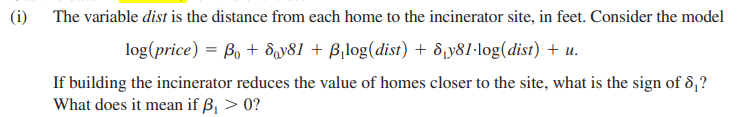


(ii) Estimate the model from part (i) and report the results in the usual form. Interpret the coefficient
on y81#
log1dist2. What do you conclude?

In [ ]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  #datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  #datos=datos.dropna()
  Y=data[lista[0]]
  X=data[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X, missing='drop')
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

(iii) Add age, age2
, rooms, baths, log(intst), log(land), and log(area) to the equation. Now, what do
you conclude about the effect of the incinerator on housing values?

(iv) Why is the coefficient on log(dist) positive and statistically significant in part (ii) but not in
part (iii)? What does this say about the controls used in part (iii)?